# Study of the noise level

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
import skimage

In [3]:
import ACE_box
import importlib
importlib.reload(ACE_box)

<module 'ACE_box' from '/home/benjamin/Documents/datascience/data jam days/scripts/ACE_box.py'>

In [4]:
data_path = '/home/benjamin/Documents/datascience/ACE/'
filename = data_path + 'ACE_-D20170207-T104031.sv.csv'
info_df,echogram,depth_data = ACE_box.extract_data(filename)

------------------------------
Data matrix size: (2693, 9163)
Start depth (in meters): 0.09278976
Stop depth (in meters): 499.8584359
Nb of pixels along depth axis: 2693
Depth per pixel (in meters): 0.185579519547
Echogram truncated to the first 100 meters (492 pixels).
-----------------------------


In [5]:
data2 = echogram - np.mean(echogram,1,keepdims=True)

<IPython.core.display.Javascript object>


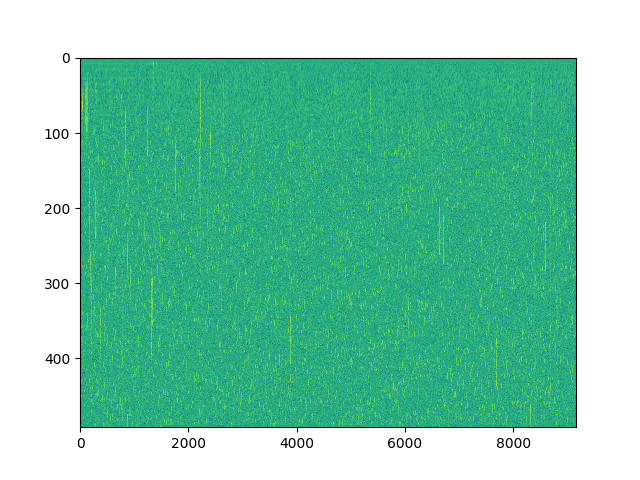

In [7]:
%matplotlib notebook
plt.imshow(data2,aspect='auto')

<IPython.core.display.Javascript object>


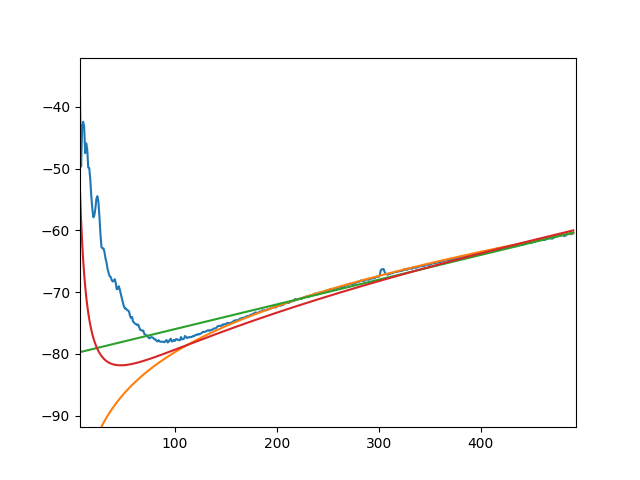

In [64]:
plt.plot( np.mean(echogram,1,keepdims=True))
x = np.arange(echogram.shape[0])
plt.plot(x, 20*np.log10(0.1855*x+0.0001)+20*0.0007*x-106.5)
plt.plot(x,20*0.002*x-80)
plt.plot(x, 20*np.log10(0.1855*x+0.0001)+20*0.0012*x-112+ 1/(0.002*x+0.004))

In [89]:
lin_echogram = 10**(echogram/20)
data_lin = lin_echogram - np.mean(lin_echogram,1,keepdims=True)
echogram_f = 20*np.log10(data_lin-np.min(data_lin)+0.00001)

In [90]:
np.max(data_lin)

58.320439141073166

In [91]:
np.min(data_lin)

-79.543986583792957

In [92]:
np.min(data_lin+1+np.min(data_lin))

-158.08797316758591

<IPython.core.display.Javascript object>


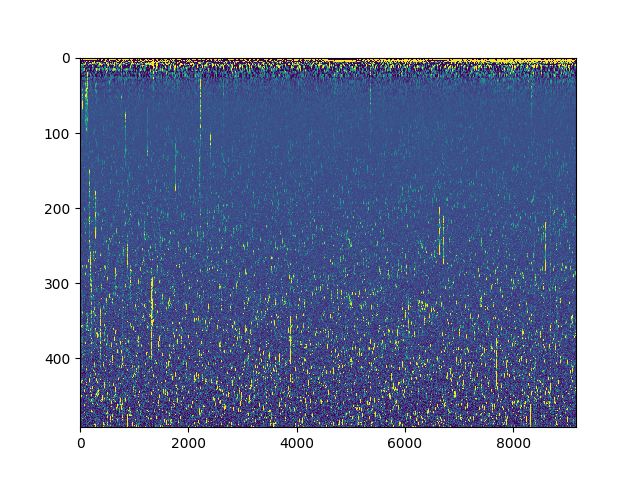

In [96]:
plt.imshow(ACE_box.fix_contrast(echogram_f),aspect='auto')

<IPython.core.display.Javascript object>


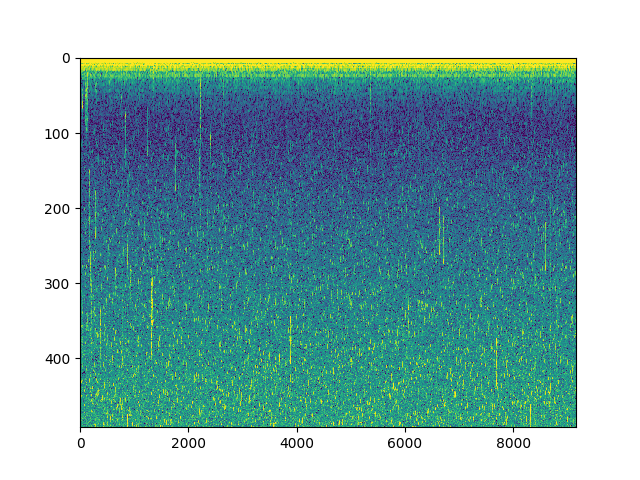

In [97]:
plt.imshow(ACE_box.fix_contrast(echogram),aspect='auto')

<IPython.core.display.Javascript object>


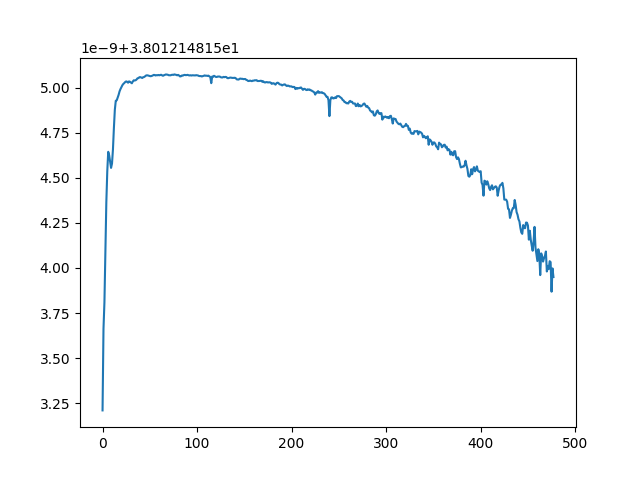

In [109]:
plt.plot( np.mean(echogram_f,1,keepdims=True)[14:])


<IPython.core.display.Javascript object>


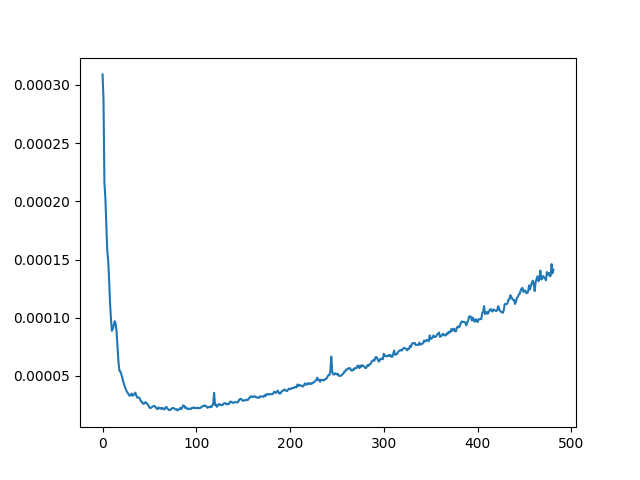

In [111]:
plt.plot( np.std(echogram_f,1,keepdims=True)[10:])

<IPython.core.display.Javascript object>


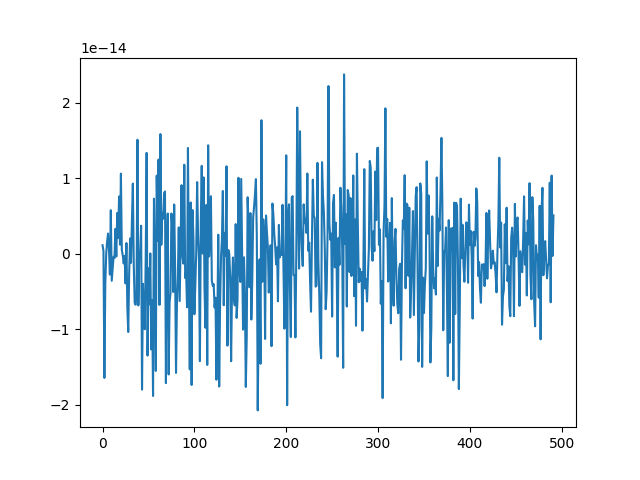

In [99]:
plt.plot( np.mean(data2,1,keepdims=True))

In [101]:
10**(38/20)

79.43282347242814

<IPython.core.display.Javascript object>


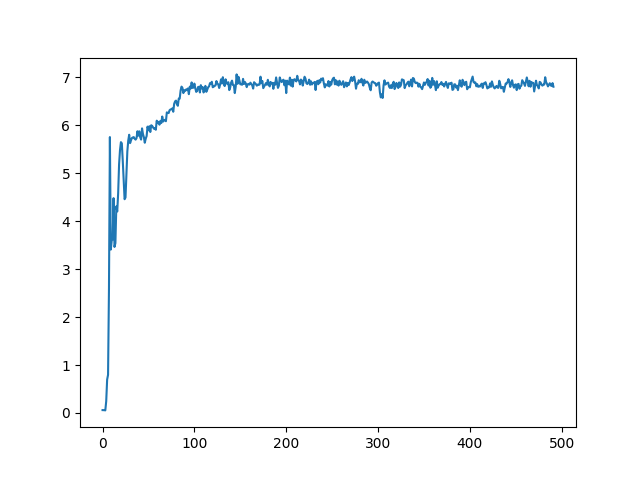

In [112]:
plt.plot( np.std(data2,1,keepdims=True))